# Day 09. Exercise 03
# Ensembles

## 0. Imports

In [1]:
import joblib
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test` and then get `X_train`, `y_train`, `X_valid`, `y_valid` from the previous `X_train`, `y_train`. Use the additional parameter `stratify`.

In [2]:
df = pd.read_csv('../data/day-of-week-not-scaled.csv')

In [3]:
x = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y)

## 2. Individual classifiers

1. Train SVM, decision tree and random forest again with the best parameters that you got from the 01 exercise with `random_state=21` for all of them.
2. Evaluate `accuracy`, `precision`, and `recall` for them on the validation set.
3. The result of each cell of the section should look like this:

```
accuracy is 0.87778
precision is 0.88162
recall is 0.87778
```

In [5]:
svc = SVC(C=10, gamma='auto', probability=True, random_state=21, kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.88757
precision is 0.89267
recall is 0.88757


In [6]:
dtc = DecisionTreeClassifier(max_depth=22, class_weight='balanced', random_state=21, criterion='gini')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.89053
precision is 0.89262
recall is 0.89053


In [7]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=28, random_state=21, criterion='gini')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")

accuracy is 0.92899
precision is 0.93009
recall is 0.92899


## 3. Voting classifiers

1. Using `VotingClassifier` and the three models that you have just trained, calculate the `accuracy`, `precision`, and `recall` on the validation set.
2. Play with the other parameteres.
3. Calculate the `accuracy`, `precision` and `recall` on the test set for the model with the best weights in terms of accuracy (if there are several of them with equal values, choose the one with the higher precision).

In [8]:
vot = VotingClassifier([('svc', svc), ('tree', dtc), ('forest', rfc)]  )
vot.fit(X_train, y_train)

VotingClassifier(estimators=[('svc',
                              SVC(C=10, gamma='auto', probability=True,
                                  random_state=21)),
                             ('tree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=22,
                                                     random_state=21)),
                             ('forest',
                              RandomForestClassifier(max_depth=28,
                                                     n_estimators=50,
                                                     random_state=21))])

In [9]:
y_pred = vot.predict(X_test)

In [10]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.5f}")

Accuracy: 0.92308
Precision: 0.92399
Recall: 0.92308


In [11]:
vot1 = VotingClassifier([('svc', svc), ('tree', dtc), ('forest', rfc)], n_jobs=-1, verbose=True  )
vot1.fit(X_train, y_train)
y_pred1 = vot1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred1):.5f}")
print(f"Precision: {precision_score(y_test, y_pred1, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred1, average='weighted'):.5f}")

Accuracy: 0.92308
Precision: 0.92399
Recall: 0.92308


In [12]:
vot1 = VotingClassifier([('svc', svc), ('tree', dtc), ('forest', rfc)], n_jobs=-1 ,weights=[2,1,1], verbose=True, voting='soft' )
vot1.fit(X_train, y_train)
y_pred1 = vot1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred1):.5f}")
print(f"Precision: {precision_score(y_test, y_pred1, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred1, average='weighted'):.5f}")

Accuracy: 0.90533
Precision: 0.90793
Recall: 0.90533


In [13]:
vot1 = VotingClassifier([('svc', svc), ('tree', dtc), ('forest', rfc)], n_jobs=-1 ,weights=[1,1,2], verbose=True, voting='soft' )
vot1.fit(X_train, y_train)
y_pred1 = vot1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred1):.5f}")
print(f"Precision: {precision_score(y_test, y_pred1, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred1, average='weighted'):.5f}")

Accuracy: 0.91716
Precision: 0.91895
Recall: 0.91716


In [14]:
vot1 = VotingClassifier([('svc', svc), ('tree', dtc), ('forest', rfc)], n_jobs=-1 , verbose=True, weights=[1,2,2] )
vot1.fit(X_train, y_train)
y_pred1 = vot1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred1):.5f}")
print(f"Precision: {precision_score(y_test, y_pred1, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred1, average='weighted'):.5f}")

Accuracy: 0.92899
Precision: 0.93017
Recall: 0.92899


## 4. Bagging classifiers

1. Using `BaggingClassifier` and `SVM` with the best parameters create an ensemble, try different values of the `n_estimators`, use `random_state=21`.
2. Play with the other parameters.
3. Calculate the `accuracy`, `precision`, and `recall` for the model with the best parameters (in terms of accuracy) on the test set (if there are several of them with equal values, choose the one with the higher precision)

In [15]:
bagging_clf = BaggingClassifier(
    base_estimator=SVC(C=10, gamma='auto', probability=True, random_state=21, kernel='rbf'),
    n_estimators=50, n_jobs=-1, random_state=21)
y_pred = bagging_clf.fit(X_train, y_train).predict(X_test)
# print(f"Best n_estimators: {best_n_estimators}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.5f}")

Accuracy: 0.90828
Precision: 0.91091
Recall: 0.90828


In [16]:
bagging_clf = BaggingClassifier(
    base_estimator=SVC(C=10, gamma='auto', probability=True, random_state=21, kernel='rbf'),
    n_estimators=20, n_jobs=-1, max_features=10)
y_pred = bagging_clf.fit(X_train, y_train).predict(X_test)
# print(f"Best n_estimators: {best_n_estimators}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.5f}")

Accuracy: 0.52959
Precision: 0.46192
Recall: 0.52959


/opt/goinfre/scornhol/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
bagging_clf = BaggingClassifier(
    base_estimator=SVC(C=10, gamma='auto', probability=True, random_state=21, kernel='rbf'),
    n_estimators=40, n_jobs=-1, random_state=6, bootstrap=False)
y_pred = bagging_clf.fit(X_train, y_train).predict(X_test)
# print(f"Best n_estimators: {best_n_estimators}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.5f}")

Accuracy: 0.89645
Precision: 0.90063
Recall: 0.89645


In [18]:
bagging_clf = BaggingClassifier(
    base_estimator=SVC(C=10, gamma='auto', probability=True, random_state=21, kernel='rbf'),
    n_estimators=60, n_jobs=-1, random_state=21, warm_start=True, bootstrap_features=True)
y_pred = bagging_clf.fit(X_train, y_train).predict(X_test)
# print(f"Best n_estimators: {best_n_estimators}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.5f}")

Accuracy: 0.82840
Precision: 0.84572
Recall: 0.82840


In [19]:
bagging_clf = BaggingClassifier(
    base_estimator=SVC(C=10, gamma='auto', probability=True, random_state=21, kernel='rbf'),
    n_estimators=20, n_jobs=-1, random_state=15, warm_start=True)
y_pred = bagging_clf.fit(X_train, y_train).predict(X_test)
# print(f"Best n_estimators: {best_n_estimators}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.5f}")

Accuracy: 0.90533
Precision: 0.90843
Recall: 0.90533


In [20]:
bagging_clf = BaggingClassifier(
    base_estimator=SVC(C=10, gamma='auto', probability=True, random_state=21, kernel='rbf'),
    n_estimators=100, n_jobs=-1, oob_score=True, random_state=50)
y_pred = bagging_clf.fit(X_train, y_train).predict(X_test)
# print(f"Best n_estimators: {best_n_estimators}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.5f}")

Accuracy: 0.91124
Precision: 0.91379
Recall: 0.91124


## 5. Stacking classifiers

1. To achieve reproducibility in this case you will have to create an object of cross-validation generator: `StratifiedKFold(n_splits=n, shuffle=True, random_state=21)`, where `n` you will try to optimize (the details are below).
2. Using `StackingClassifier` and the three models that you have recently trained, calculate the `accuracy`, `precision` and `recall` on the validation set, try different values of `n_splits` `[2, 3, 4, 5, 6, 7]` in the cross-validation generator and parameter `passthrough` in the classifier itself,
3. Calculate the `accuracy`, `precision`, and `recall` for the model with the best parameters (in terms of accuracy) on the test set (if there are several of them with equal values, choose the one with the higher precision). Use `final_estimator=LogisticRegression(solver='liblinear')`.

In [21]:
stacking = StackingClassifier(
    [('svc', svc), ('tree', dtc), ('forest', rfc)])

In [22]:
param_grid = {'cv': [2, 3, 4, 5, 6, 7], 'passthrough': [True, False]}

gs = GridSearchCV(stacking, param_grid, scoring='accuracy', n_jobs=-1)

In [23]:
gs.fit(X_train, y_train)
gs.best_params_

/opt/goinfre/scornhol/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/goinfre/scornhol/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

{'cv': 6, 'passthrough': False}

In [24]:
y_pred = gs.best_estimator_.predict(X_test)

In [25]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.5f}")

Accuracy: 0.91716
Precision: 0.92049
Recall: 0.91716


## 6. Predictions

1. Choose the best model in terms of accuracy (if there are several of them with equal values, choose the one with the higher precision).
2. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which labname and for which users.
3. Save the model.

In [26]:
y_pred1 = vot1.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred1):.5f}")
print(f"Precision: {precision_score(y_test, y_pred1, average='weighted'):.5f}")
print(f"Recall: {recall_score(y_test, y_pred1, average='weighted'):.5f}")

Accuracy: 0.92899
Precision: 0.93017
Recall: 0.92899


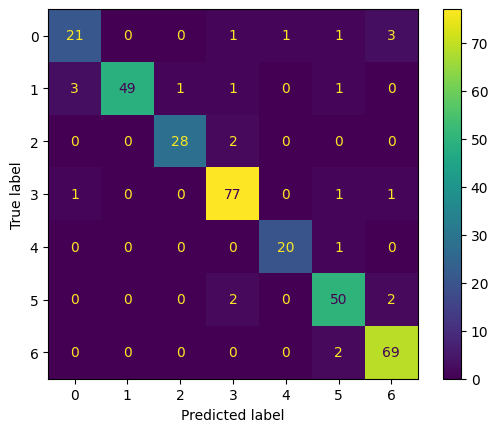

In [27]:
ConfusionMatrixDisplay.from_estimator(vot1, X_test, y_test)

In [28]:
joblib.dump(vot1, '../data/model1.joblib')

['../data/model1.joblib']